In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# Load the dataset
data = pd.read_csv('UberDataset.csv')

data.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [49]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [50]:
data.dropna(inplace=True)


In [51]:
data.isnull().sum()


START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

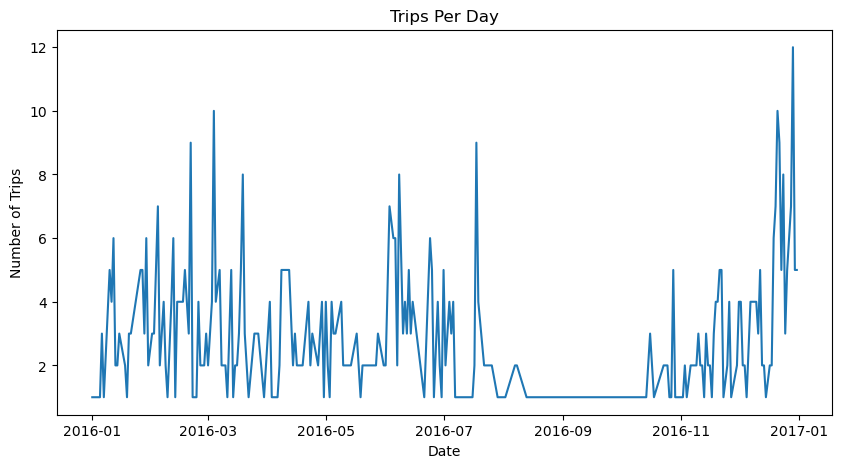

In [52]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'])

daily_trips = data.groupby(data['START_DATE'].dt.date).size()

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
daily_trips.plot(kind='line', title='Trips Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()


In [53]:
# Statistical summary
data.describe()


,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


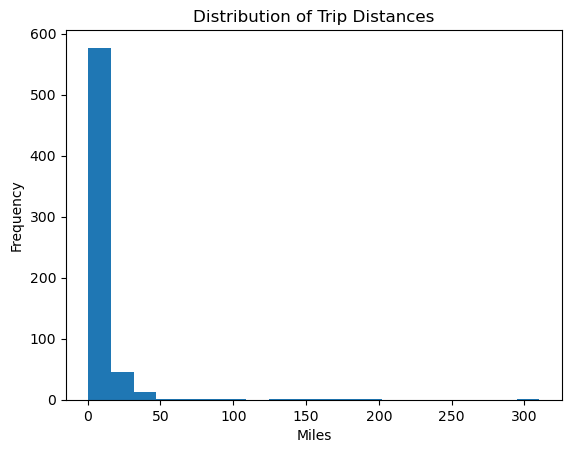

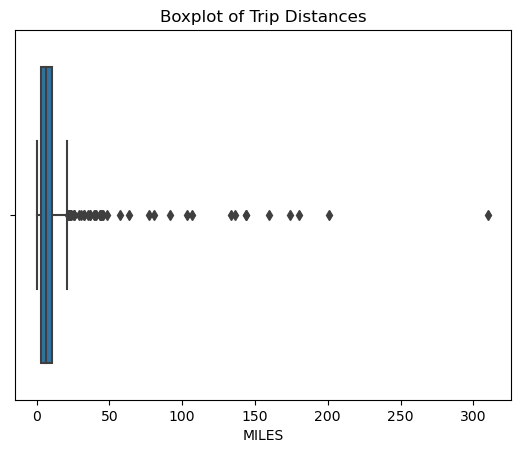

In [54]:
# Distribution of MILES
data['MILES'].plot(kind='hist', bins=20, title='Distribution of Trip Distances')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

# Boxplot for MILES
import seaborn as sns
sns.boxplot(data=data, x='MILES')
plt.title('Boxplot of Trip Distances')
plt.show()



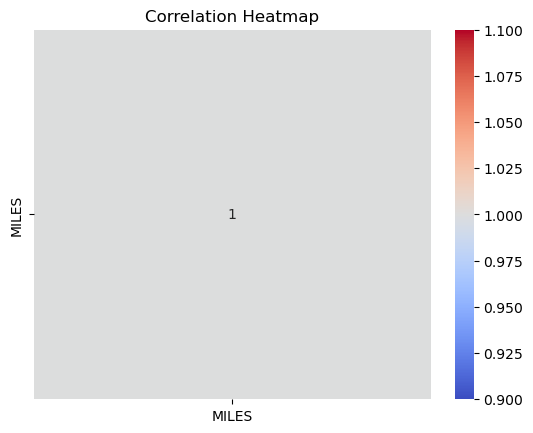

In [55]:
# Correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [56]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
data = data.drop_duplicates()


Number of duplicate rows: 1


In [57]:
# Remove trips with distances > 100 miles (as an example)
data = data[data['MILES'] <= 100]


In [58]:
# Extract day of the week
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['DAY_OF_WEEK'] = data['START_DATE'].dt.day_name()

# Extract hour of the trip
data['HOUR'] = data['START_DATE'].dt.hour


In [59]:
# Categorize distances into short, medium, and long
bins = [0, 5, 20, 100]  # Adjust as needed
labels = ['Short', 'Medium', 'Long']
data['DISTANCE_CATEGORY'] = pd.cut(data['MILES'], bins=bins, labels=labels)


In [60]:
print(data[['START_DATE', 'MILES', 'DAY_OF_WEEK', 'HOUR', 'DISTANCE_CATEGORY']].head())


           START_DATE  MILES DAY_OF_WEEK  HOUR DISTANCE_CATEGORY
0 2016-01-01 21:11:00    5.1      Friday    21            Medium
2 2016-01-02 20:25:00    4.8    Saturday    20             Short
3 2016-01-05 17:31:00    4.7     Tuesday    17             Short
4 2016-01-06 14:42:00   63.7   Wednesday    14              Long
5 2016-01-06 17:15:00    4.3   Wednesday    17             Short


In [61]:
from sklearn.preprocessing import LabelEncoder

# Encode CATEGORY
category_encoder = LabelEncoder()
data['CATEGORY_ENCODED'] = category_encoder.fit_transform(data['CATEGORY'])

# Display the mapping for CATEGORY
category_mapping = dict(zip(category_encoder.classes_, category_encoder.transform(category_encoder.classes_)))
print("CATEGORY Encoding Mapping:", category_mapping)

# Encode PURPOSE
purpose_encoder = LabelEncoder()
data['PURPOSE_ENCODED'] = purpose_encoder.fit_transform(data['PURPOSE'].astype(str))  # Convert NaN to string to avoid issues

# Display the mapping for PURPOSE
purpose_mapping = dict(zip(purpose_encoder.classes_, purpose_encoder.transform(purpose_encoder.classes_)))
print("PURPOSE Encoding Mapping:", purpose_mapping)

# Preview the encoded columns
print(data[['CATEGORY', 'CATEGORY_ENCODED', 'PURPOSE', 'PURPOSE_ENCODED']].head())


CATEGORY Encoding Mapping: {'Business': 0, 'Personal': 1}
PURPOSE Encoding Mapping: {'Airport/Travel': 0, 'Between Offices': 1, 'Charity ($)': 2, 'Customer Visit': 3, 'Errand/Supplies': 4, 'Meal/Entertain': 5, 'Meeting': 6, 'Moving': 7, 'Temporary Site': 8}
   CATEGORY  CATEGORY_ENCODED          PURPOSE  PURPOSE_ENCODED
0  Business                 0   Meal/Entertain                5
2  Business                 0  Errand/Supplies                4
3  Business                 0          Meeting                6
4  Business                 0   Customer Visit                3
5  Business                 0   Meal/Entertain                5


In [62]:
from sklearn.preprocessing import MinMaxScaler

# Normalize MILES
scaler = MinMaxScaler()
data['MILES_NORMALIZED'] = scaler.fit_transform(data[['MILES']])

# Preview the normalized column
print(data[['MILES', 'MILES_NORMALIZED']].head())


   MILES  MILES_NORMALIZED
0    5.1          0.050383
2    4.8          0.047097
3    4.7          0.046002
4   63.7          0.692223
5    4.3          0.041621


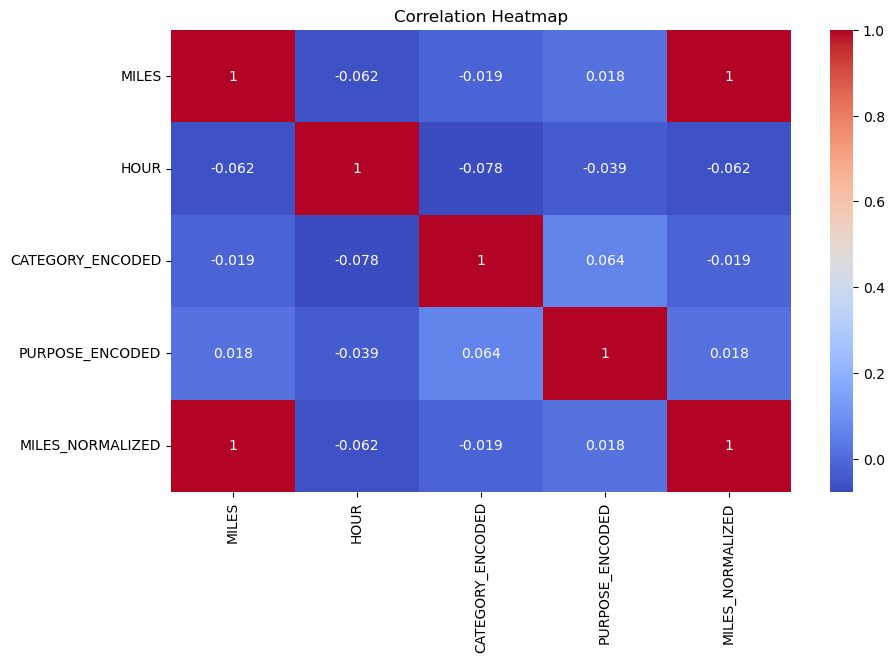

In [63]:
# Check correlation between numerical features
correlation_matrix = data.corr()

# Plot heatmap of correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select the relevant features and target
X = data[['CATEGORY_ENCODED', 'PURPOSE_ENCODED', 'MILES', 'HOUR']]  # Features
y = data['DISTANCE_CATEGORY']  # Target (example: Short, Medium, Long)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores
importance = model.feature_importances_

# Display feature importance
for feature, score in zip(X.columns, importance):
    print(f"{feature}: {score:.4f}")


CATEGORY_ENCODED: 0.0014
PURPOSE_ENCODED: 0.0956
MILES: 0.8859
HOUR: 0.0172


In [65]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

        Long       1.00      1.00      1.00         9
      Medium       1.00      1.00      1.00        64
       Short       1.00      1.00      1.00        56

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129

Model Accuracy: 1.00


In [66]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")


Cross-Validation Scores: [1.        0.9921875 0.984375  1.        1.       ]
Mean Accuracy: 1.00


In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


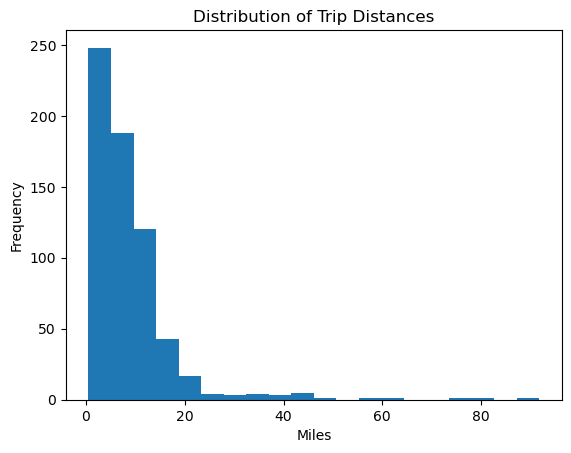

In [74]:
# Histogram for MILES
data['MILES'].plot(kind='hist', bins=20, title='Distribution of Trip Distances')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()


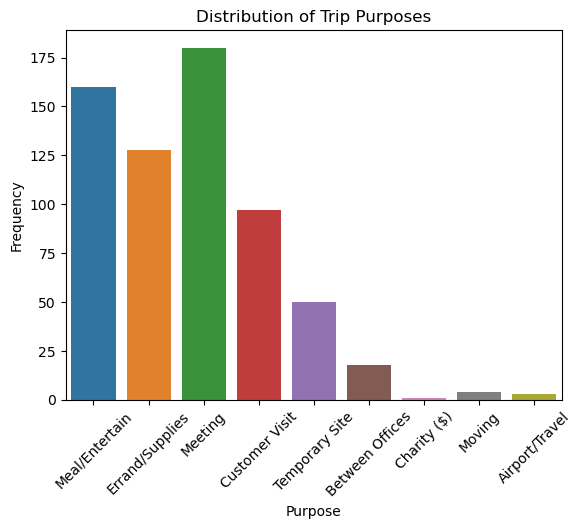

In [75]:
# Count plot for PURPOSE
sns.countplot(data=data, x='PURPOSE')
plt.title('Distribution of Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


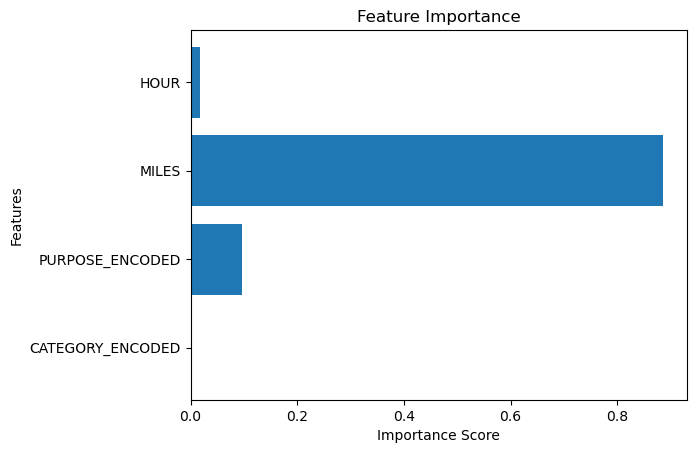

In [76]:
# Plot feature importances
importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


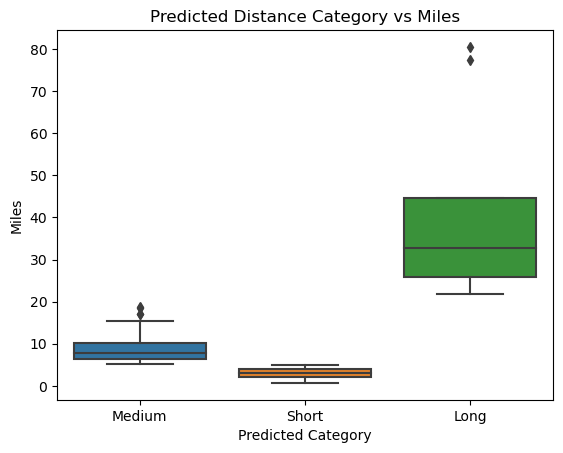

In [77]:
# Visualize predictions vs MILES
sns.boxplot(x=y_pred, y=X_test['MILES'])
plt.title('Predicted Distance Category vs Miles')
plt.xlabel('Predicted Category')
plt.ylabel('Miles')
plt.show()
